## Loading packages

In [2]:
import seaborn as sb
import plotly.express as ply

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
    
pd.set_option('display.max_columns', 100)

# ! pip install ipywidgets - U
# ! pip install IProgress

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Capst_Proj\data_ai.csv')#, enc = '')

In [4]:
df_org = df.copy()

In [5]:
df_org.shape

(595212, 59)

In [6]:
df.drop('id', inplace = True, axis = 1)

In [7]:
df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


## Data Studying

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print()
    print(df[col].nunique())
    print(df[col].min())
    print(df[col].max())
    print()

target
[0 1]

2
0
1

ps_ind_01
[2 1 5 0 4 3 6 7]

8
0
7

ps_ind_02_cat
[ 2  1  4  3 -1]

5
-1
4

ps_ind_03
[ 5  7  9  2  0  4  3  1 11  6  8 10]

12
0
11

ps_ind_04_cat
[ 1  0 -1]

3
-1
1

ps_ind_05_cat
[ 0  1  4  3  6  5 -1  2]

8
-1
6

ps_ind_06_bin
[0 1]

2
0
1

ps_ind_07_bin
[1 0]

2
0
1

ps_ind_08_bin
[0 1]

2
0
1

ps_ind_09_bin
[0 1]

2
0
1

ps_ind_10_bin
[0 1]

2
0
1

ps_ind_11_bin
[0 1]

2
0
1

ps_ind_12_bin
[0 1]

2
0
1

ps_ind_13_bin
[0 1]

2
0
1

ps_ind_14
[0 1 2 3 4]

5
0
4

ps_ind_15
[11  3 12  8  9  6 13  4 10  5  7  2  0  1]

14
0
13

ps_ind_16_bin
[0 1]

2
0
1

ps_ind_17_bin
[1 0]

2
0
1

ps_ind_18_bin
[0 1]

2
0
1

ps_reg_01
[0.7 0.8 0.  0.9 0.6 0.5 0.4 0.3 0.2 0.1]

10
0.0
0.9

ps_reg_02
[0.2 0.4 0.  0.6 1.8 0.1 0.7 1.4 0.9 0.3 0.5 0.8 1.  1.3 1.6 1.5 1.2 1.1
 1.7]

19
0.0
1.8

ps_reg_03
[ 0.71807033  0.76607767 -1.         ...  1.60078106  1.63075903
  1.74355958]

5013
-1.0
4.037945022

ps_car_01_cat
[10 11  7  6  9  5  4  8  3  0  2  1 -1]

13
-1
11

ps_car_02_cat


0.0
0.9

ps_calc_02
[0.5 0.1 0.7 0.9 0.6 0.8 0.4 0.  0.3 0.2]

10
0.0
0.9

ps_calc_03
[0.2 0.3 0.1 0.  0.4 0.5 0.6 0.8 0.9 0.7]

10
0.0
0.9

ps_calc_04
[3 2 1 4 0 5]

6
0
5

ps_calc_05
[1 2 4 3 0 5 6]

7
0
6

ps_calc_06
[10  9  7  6  8  5  4  3  2  1  0]

11
0
10

ps_calc_07
[1 5 3 2 4 6 0 7 8 9]

10
0
9

ps_calc_08
[10  8 11  6  9  7  5 12  4  3  2]

11
2
12

ps_calc_09
[1 2 4 3 0 5 6 7]

8
0
7

ps_calc_10
[ 5  7  2 12  8 10 13 11  9 18  4 15  6 14 16  3  1 17  0 21 19 20 22 23
 25 24]

26
0
25

ps_calc_11
[ 9  3  4  2  7  6  5 10  8  1  0 13 11 12 14 15 16 19 17 18]

20
0
19

ps_calc_12
[ 1  2  0  5  3  4  6  7  8  9 10]

11
0
10

ps_calc_13
[ 5  1  7  4  0  3  6  2  8 10  9 11 12 13]

14
0
13

ps_calc_14
[ 8  9  7  3 10  6  5 11  4 14 13 12 16  2  1 15 17  0 19 20 18 22 21 23]

24
0
23

ps_calc_15_bin
[0 1]

2
0
1

ps_calc_16_bin
[1 0]

2
0
1

ps_calc_17_bin
[1 0]

2
0
1

ps_calc_18_bin
[0 1]

2
0
1

ps_calc_19_bin
[0 1]

2
0
1

ps_calc_20_bin
[1 0]

2
0
1



In [9]:
dict_vs = {'feature':[], 'unique_values': [],  'nunique':[], 'min': [], 'max': []} 
for col in df.columns:
    dict_vs['feature'].append(col)
    dict_vs['nunique'].append(df[col].nunique())
    dict_vs['unique_values'].append(df[col].unique())
    dict_vs['min'].append(df[col].min()) # Since Numeric Changed to Category
    dict_vs['max'].append(df[col].max())

pd.DataFrame(dict_vs)

,feature,unique_values,nunique,min,max
0,target,"[0, 1]",2,0.000000,1.000000
1,ps_ind_01,"[2, 1, 5, 0, 4, 3, 6, 7]",8,0.000000,7.000000
2,ps_ind_02_cat,"[2, 1, 4, 3, -1]",5,-1.000000,4.000000
3,ps_ind_03,"[5, 7, 9, 2, 0, 4, 3, 1, 11, 6, 8, 10]",12,0.000000,11.000000
4,ps_ind_04_cat,"[1, 0, -1]",3,-1.000000,1.000000
5,ps_ind_05_cat,"[0, 1, 4, 3, 6, 5, -1, 2]",8,-1.000000,6.000000
6,ps_ind_06_bin,"[0, 1]",2,0.000000,1.000000
7,ps_ind_07_bin,"[1, 0]",2,0.000000,1.000000
8,ps_ind_08_bin,"[0, 1]",2,0.000000,1.000000
9,ps_ind_09_bin,"[0, 1]",2,0.000000,1.000000


In [10]:
df.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

# Features Indentification or Grouping

In [11]:
cols_cat =     ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',      # 14
               'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',  'ps_car_07_cat', 
               'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

cols_bin =     ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',      # 17
               'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
               'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',  
               'ps_calc_19_bin', 'ps_calc_20_bin']

cols_reg =     ['ps_reg_01', 'ps_reg_02', 'ps_reg_03','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] # 7

cols_ord =     ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',                          # 19 
                'ps_calc_01', 'ps_calc_02','ps_calc_03', 'ps_calc_04', 'ps_calc_05',                                   
                'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
                'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
                

cols_cat_to_bin = ['ps_ind_04_cat','ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat']                     # 4

cols_cat_to_ord = ['ps_ind_02_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_09_cat']                    # 4


## Down Sampling. 
Since it is difficult to Handle 6 lacs data for various computation and high skewed data imbalance found, down sampling would be carried out.

In [12]:
from sklearn.utils import resample
claimed = df[df['target'] == 1]
not_claimed = df[df['target'] == 0]
print(len(claimed))
print(len(not_claimed))

21694
573518


In [31]:
len(df) * 0.12 * 0.7 # Downsampled numbered

49997.808

1. For 12% of Population Data with balancing of minimum 30:70 ratio on Target. 
2. Downsampled Target '0' numbered to Total = (21694 / 3.65) * 12 * 0.7

In [14]:
not_claimed_downsampled = resample(not_claimed,
                             replace = False,
                             n_samples = 50000,
                             random_state = 69)
not_claimed_downsampled

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
551101,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.3,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.607205,0.347275,3.000000,0.8,0.1,0.9,2,3,8,3,11,3,10,7,3,2,9,0,1,0,0,0,0
519649,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,6,1,0,0,0.9,1.3,1.268611,9,1,-1,0,-1,15,0,1,2,1,5,2,0.424264,0.622760,0.391152,1.414214,0.4,0.2,0.0,0,3,9,1,9,2,7,6,2,4,10,0,1,1,1,0,0
170152,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,3,0,0,1,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,0,1,49,3,0.400000,0.671451,0.368511,2.828427,0.4,0.0,0.3,4,0,9,1,8,2,10,5,0,5,11,0,1,1,0,1,0
422193,0,0,4,7,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0.6,0.2,0.552268,10,1,-1,0,0,0,0,1,0,1,98,3,0.400000,0.718469,0.397492,2.828427,0.8,0.3,0.8,2,2,10,3,10,4,11,6,1,4,11,0,0,0,0,1,1
362008,0,2,1,2,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.4,0.6,0.997810,11,1,-1,0,-1,14,1,1,2,1,29,3,0.447214,0.962950,0.408412,3.464102,0.0,0.0,0.6,3,1,7,3,9,1,10,3,4,5,9,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74922,0,1,1,6,1,4,0,1,0,0,0,0,0,0,0,4,1,0,0,0.1,0.0,-1.000000,7,1,-1,0,-1,0,1,1,2,1,88,3,0.400000,0.743540,0.397492,2.828427,0.9,0.7,0.8,2,3,7,2,7,2,7,2,3,2,13,0,0,1,0,1,0
11477,0,0,1,6,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.9,0.2,0.524404,6,0,-1,0,1,14,1,1,0,1,104,2,0.445982,0.623473,0.406202,1.414214,0.2,0.6,0.1,2,2,8,3,8,0,8,7,1,5,9,0,1,0,0,1,0
585028,0,2,2,3,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.0,0.6,1.191900,7,1,-1,0,-1,11,1,1,2,1,11,2,0.316228,0.674506,0.368782,3.316625,0.6,0.6,0.7,3,3,8,0,10,2,5,5,4,4,7,0,1,0,0,0,0
538501,0,5,2,2,0,0,0,0,0,1,0,0,0,0,0,10,1,0,0,0.9,0.4,0.840759,11,1,-1,0,-1,10,0,1,2,1,28,3,0.374166,0.745066,0.378814,2.828427,0.2,0.3,0.9,3,2,4,3,6,5,9,7,4,4,6,0,0,1,1,0,0


In [15]:
df_downsampled = pd.concat([not_claimed_downsampled, claimed], axis = 0)
df_ds = df_downsampled.reset_index()
df_ds.drop('index', inplace = True, axis = 1)

# HeatMap & Correlation

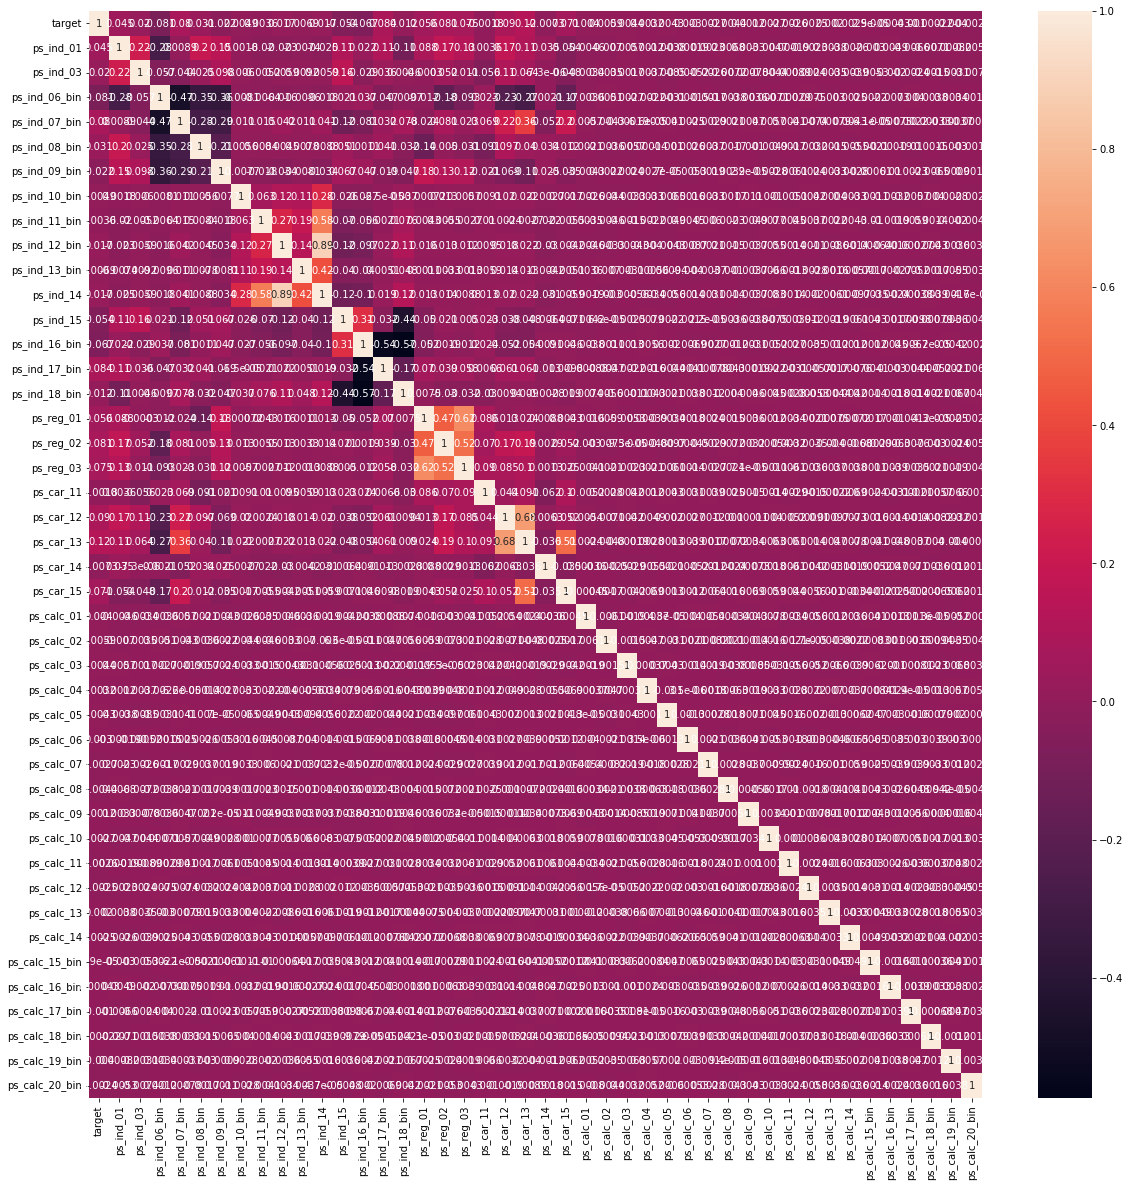

In [16]:
df_ds[cols_cat] = df_ds[cols_cat].astype('category')
plt.figure(figsize=(20,20))
sns.heatmap(df_ds.corr(),annot = True)
plt.show()

In [17]:
df_hm= df_ds.iloc[:,:38]

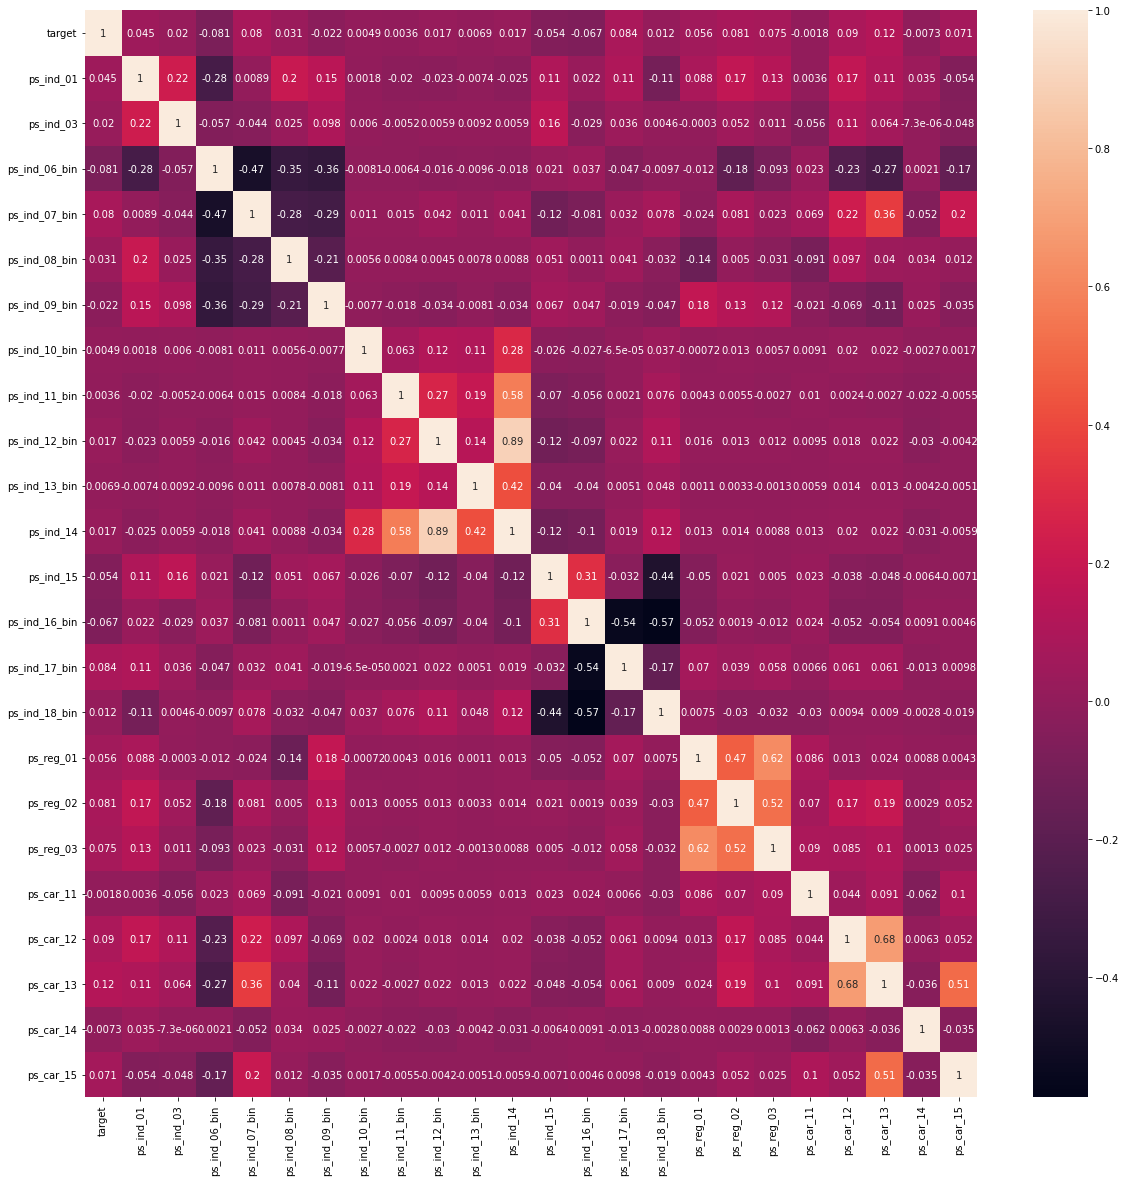

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df_hm.corr(),annot = True)
plt.show()

In [19]:
corr2 = df_hm.corr()
corr2

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
target,1.000000,0.044554,0.019944,-0.080814,0.080189,0.030703,-0.022259,0.004869,0.003607,0.017400,0.006915,0.016673,-0.053858,-0.067327,0.084110,0.012190,0.056064,0.081023,0.074812,-0.001752,0.090046,0.124341,-0.007323,0.070918
ps_ind_01,0.044554,1.000000,0.224507,-0.279913,0.008921,0.197414,0.146602,0.001845,-0.020074,-0.022673,-0.007421,-0.025061,0.108253,0.022327,0.106212,-0.106192,0.088463,0.172888,0.128399,0.003559,0.170460,0.106031,0.035483,-0.054293
ps_ind_03,0.019944,0.224507,1.000000,-0.056921,-0.044179,0.025294,0.097814,0.006043,-0.005154,0.005909,0.009224,0.005880,0.162554,-0.028611,0.035620,0.004627,-0.000298,0.051877,0.010578,-0.055724,0.109520,0.064399,-0.000007,-0.048010
ps_ind_06_bin,-0.080814,-0.279913,-0.056921,1.000000,-0.474455,-0.346612,-0.359360,-0.008137,-0.006409,-0.015985,-0.009550,-0.017601,0.021177,0.037208,-0.046657,-0.009676,-0.012391,-0.181324,-0.093282,0.023414,-0.227328,-0.274538,0.002105,-0.165208
ps_ind_07_bin,0.080189,0.008921,-0.044179,-0.474455,1.000000,-0.283113,-0.293526,0.010669,0.015271,0.042306,0.010689,0.041014,-0.122798,-0.081293,0.031869,0.077578,-0.024015,0.081074,0.022619,0.069417,0.222465,0.358269,-0.051767,0.197902
ps_ind_08_bin,0.030703,0.197414,0.025294,-0.346612,-0.283113,1.000000,-0.214434,0.005577,0.008421,0.004543,0.007783,0.008788,0.050892,0.001102,0.041239,-0.031770,-0.140423,0.005016,-0.030845,-0.091254,0.096622,0.040210,0.033665,0.011725
ps_ind_09_bin,-0.022259,0.146602,0.097814,-0.359360,-0.293526,-0.214434,1.000000,-0.007687,-0.017978,-0.033666,-0.008100,-0.034289,0.066639,0.046971,-0.019041,-0.047100,0.180597,0.127424,0.120408,-0.020853,-0.069022,-0.112859,0.024691,-0.035153
ps_ind_10_bin,0.004869,0.001845,0.006043,-0.008137,0.010669,0.005577,-0.007687,1.000000,0.063128,0.119755,0.108861,0.284960,-0.026322,-0.026950,-0.000065,0.037356,-0.000724,0.012753,0.005728,0.009130,0.019719,0.022271,-0.002686,0.001736
ps_ind_11_bin,0.003607,-0.020074,-0.005154,-0.006409,0.015271,0.008421,-0.017978,0.063128,1.000000,0.265502,0.191619,0.575603,-0.070107,-0.055506,0.002072,0.075573,0.004314,0.005455,-0.002732,0.010225,0.002395,-0.002666,-0.022138,-0.005544
ps_ind_12_bin,0.017400,-0.022673,0.005909,-0.015985,0.042306,0.004543,-0.033666,0.119755,0.265502,1.000000,0.138521,0.892479,-0.117897,-0.097027,0.022101,0.109727,0.015589,0.012555,0.012068,0.009548,0.017917,0.021929,-0.030317,-0.004228


In [20]:
corr1 = df_ds.corr()
corr1

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.044554,0.019944,-0.080814,0.080189,0.030703,-0.022259,0.004869,0.003607,0.017400,0.006915,0.016673,-0.053858,-0.067327,0.084110,0.012190,0.056064,0.081023,0.074812,-0.001752,0.090046,0.124341,-0.007323,0.070918,0.003981,0.005858,0.004450,0.003181,0.004304,0.002977,-0.002739,-0.004435,0.001210,0.002660,-0.002635,-0.002496,0.001983,0.002534,0.000029,0.000429,-0.001010,-0.000216,-0.003965,-0.002360
ps_ind_01,0.044554,1.000000,0.224507,-0.279913,0.008921,0.197414,0.146602,0.001845,-0.020074,-0.022673,-0.007421,-0.025061,0.108253,0.022327,0.106212,-0.106192,0.088463,0.172888,0.128399,0.003559,0.170460,0.106031,0.035483,-0.054293,-0.004583,-0.006985,0.005715,0.001226,-0.003799,-0.000189,0.002286,0.006838,0.003271,-0.004668,0.000192,-0.002348,0.003788,-0.002552,-0.002984,0.004943,-0.006619,-0.007098,0.000824,-0.005283
ps_ind_03,0.019944,0.224507,1.000000,-0.056921,-0.044179,0.025294,0.097814,0.006043,-0.005154,0.005909,0.009224,0.005880,0.162554,-0.028611,0.035620,0.004627,-0.000298,0.051877,0.010578,-0.055724,0.109520,0.064399,-0.000007,-0.048010,-0.003373,0.003495,0.001749,0.003724,-0.008550,-0.000517,-0.002609,-0.007232,0.000777,-0.004417,-0.000890,0.002393,0.003535,-0.003934,-0.005339,-0.002011,-0.002375,-0.001462,-0.003092,-0.007447
ps_ind_06_bin,-0.080814,-0.279913,-0.056921,1.000000,-0.474455,-0.346612,-0.359360,-0.008137,-0.006409,-0.015985,-0.009550,-0.017601,0.021177,0.037208,-0.046657,-0.009676,-0.012391,-0.181324,-0.093282,0.023414,-0.227328,-0.274538,0.002105,-0.165208,-0.003586,0.005124,0.002691,-0.002169,-0.003051,-0.000152,-0.001735,-0.003783,-0.003582,0.000706,-0.000292,0.007493,-0.003049,0.002507,0.002218,-0.007293,0.004049,0.003767,0.003447,0.001167
ps_ind_07_bin,0.080189,0.008921,-0.044179,-0.474455,1.000000,-0.283113,-0.293526,0.010669,0.015271,0.042306,0.010689,0.041014,-0.122798,-0.081293,0.031869,0.077578,-0.024015,0.081074,0.022619,0.069417,0.222465,0.358269,-0.051767,0.197902,0.005731,-0.004349,-0.000188,-0.000066,0.004093,0.002518,-0.002885,0.002139,0.004709,0.005728,0.004123,-0.007397,-0.000789,0.004347,-0.000061,-0.000748,0.002158,0.000327,-0.000370,-0.000785
ps_ind_08_bin,0.030703,0.197414,0.025294,-0.346612,-0.283113,1.000000,-0.214434,0.005577,0.008421,0.004543,0.007783,0.008788,0.050892,0.001102,0.041239,-0.031770,-0.140423,0.005016,-0.030845,-0.091254,0.096622,0.040210,0.033665,0.011725,0.002119,-0.003615,-0.005689,0.000138,-0.001040,0.002607,0.003703,-0.001663,-0.001046,-0.004886,0.001734,-0.003195,0.001479,-0.005510,-0.002144,-0.000189,-0.010147,0.001452,-0.003044,-0.001673
ps_ind_09_bin,-0.022259,0.146602,0.097814,-0.359360,-0.293526,-0.214434,1.000000,-0.007687,-0.017978,-0.033666,-0.008100,-0.034289,0.066639,0.046971,-0.019041,-0.047100,0.180597,0.127424,0.120408,-0.020853,-0.069022,-0.112859,0.024691,-0.035153,-0.004254,0.002185,0.002413,0.002653,0.000070,-0.005286,0.001905,0.003865,0.000022,-0.002772,-0.006124,0.002359,0.003283,-0.002806,-0.000607,0.010169,0.002342,-0.006507,-0.000905,0.001088
ps_ind_10_bin,0.004869,0.001845,0.006043,-0.008137,0.010669,0.005577,-0.007687,1.000000,0.063128,0.119755,0.108861,0.284960,-0.026322,-0.026950,-0.000065,0.037356,-0.000724,0.012753,0.005728,0.009130,0.019719,0.022271,-0.002686,0.001736,-0.002581,-0.004415,-0.003306,0.003332,-0.006475,0.001645,0.003263,-0.001722,0.010632,0.001031,-0.005091,0.004189,0.000396,0.003314,-0.001116,-0.003221,-0.005695,0.004026,0.002795,-0.002751
ps_ind_11_bin,0.003607,-0.020074,-0.005154,-0.00

# EDA - Exploratory Data Analysis:

## 1. Write at least 3 important inferences from the data above

1. The data are fully masked couldnt able to understand the context of the features execpt target column, where the policy holder claimed or not, viz 1 or 0.
2. Mentioned that the feature names indicating by postfixes belongs to same groups. Viz binary, categorical, high cardinality and ordinal/continuous variables. However this may be verified/cross checked by clustering methods(K Means or Dendrogram Unsupervised Learning Techniques)
3. The feature ps_calc_11 probably represents the 20 years individual year data
4. Except the features [ps_reg_03, ps_car_12, ps_car_13, ps_car_14, car_15] preferably continuous(Regressive Type). And the remaining all are belong to the Categorical/Ordinal type 
5. The feature 'id' is Nominal type. Hence it can be ignored.


## 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

In [24]:
df_org['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [27]:
21694/(21694+573518) * 100

3.6447517859182947

## Inference

1. Highly skewed. The Calimed target Percent is 3.65% only. 
2. Hence balancing has to be caried out atleast in the ratio of 30 : 70, inorder to get appropriate F1 Score and related metrics.

## 3. How many categorical features are there?

In [ ]:
cols_cat =     ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',      # 14
               'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',  'ps_car_07_cat', 
               'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

cols_bin =     ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',      # 17
               'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
               'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',  
               'ps_calc_19_bin', 'ps_calc_20_bin']

cols_reg =     ['ps_reg_01', 'ps_reg_02', 'ps_reg_03','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] # 7

cols_ord =     ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',                          # 19 
                'ps_calc_01', 'ps_calc_02','ps_calc_03', 'ps_calc_04', 'ps_calc_05',                                   
                'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
                'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
                

cols_cat_to_bin = ['ps_ind_04_cat','ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat']                     # 4

cols_cat_to_ord = ['ps_ind_02_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_09_cat']     

## Inference

1. Strictly speaking, all the features are come under numerical variables only. 

2. However based on the nomenclature and provided instructions, implies certain things grouped under categorical variables.

cols_cat =     
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat'(misplaced),
'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',  'ps_car_07_cat', 
'ps_car_08_cat'(misplaced), 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

Totaly - 12 nos

4. Also some of them ([ps_ind_04_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat] - 4 nos ) could be transferred to binary on appropriate filling of missing values.

Then Totally - 8 nos.

5. Also it has to be cross verified with Unspervised Learning methods.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [54]:
df_km = df_ds.T

In [55]:
scaler = StandardScaler()
df_ss = scaler.fit_transform(df_km)

In [56]:
df_ss.shape

(58, 71694)

In [57]:
kmeans = KMeans(n_clusters = 5)

In [58]:
kmeans.fit(df_ss)

KMeans(n_clusters=5)

In [59]:
labels = kmeans.labels_
print(labels)
len(labels)

[4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4 4 4 4 3 4 4 4 4 1 0 4 4 4
 0 4 4 4 0 0 2 0 2 0 2 2 4 0 2 4 4 4 4 4 4]


58

In [60]:
kmeans.cluster_centers_.shape

(5, 71694)

In [61]:
kmeans.cluster_centers_

array([[-0.06931859, -0.05241834, -0.04542991, ..., -0.0741786 ,
        -0.07826527, -0.16419384],
       [ 6.94841795,  0.99028714,  6.73517603, ...,  7.39471706,
         7.39315239,  6.8127754 ],
       [ 0.68982549,  1.94186056,  0.732403  , ...,  0.31255324,
         0.24839536,  0.88102656],
       [ 1.3504547 ,  4.16219853,  1.66386778, ...,  0.2494136 ,
         0.55309823,  1.00723398],
       [-0.31259459, -0.45684361, -0.32792489, ..., -0.2291099 ,
        -0.22451577, -0.31273627]])

In [63]:
df_km['labels'] = labels

In [65]:
df_km[['labels']]

,labels
target,4
ps_ind_01,0
ps_ind_02_cat,4
ps_ind_03,0
ps_ind_04_cat,4
ps_ind_05_cat,4
ps_ind_06_bin,4
ps_ind_07_bin,4
ps_ind_08_bin,4
ps_ind_09_bin,4


In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA()
PrincipalComponents = pca.fit_transform(df_ds)

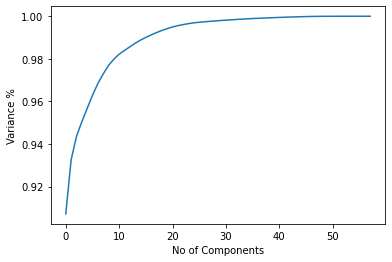

In [77]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.show()

In [78]:
pca.explained_variance_ratio_

array([9.07138073e-01, 2.54538074e-02, 1.09202655e-02, 6.92086661e-03,
       6.24390693e-03, 6.21245989e-03, 5.45899067e-03, 4.53060664e-03,
       3.99117477e-03, 2.96637609e-03, 2.35486530e-03, 1.75129119e-03,
       1.70918008e-03, 1.66302794e-03, 1.46740383e-03, 1.28032163e-03,
       1.18992189e-03, 1.06392078e-03, 1.02692788e-03, 8.20553079e-04,
       8.16757736e-04, 6.01723541e-04, 5.17205299e-04, 4.39548414e-04,
       3.77940575e-04, 2.60082663e-04, 2.25086953e-04, 2.03666365e-04,
       1.92368078e-04, 1.86791112e-04, 1.72280060e-04, 1.69126157e-04,
       1.67687984e-04, 1.48063504e-04, 1.43121079e-04, 1.31136858e-04,
       1.14048783e-04, 1.07004306e-04, 1.05703185e-04, 1.05452554e-04,
       9.86696993e-05, 8.79873896e-05, 8.44709996e-05, 8.27008633e-05,
       6.82468268e-05, 6.81378785e-05, 6.72359982e-05, 3.42383561e-05,
       2.20072153e-05, 1.50438077e-05, 1.10856731e-05, 7.02114564e-06,
       2.16789816e-06, 1.01792181e-06, 8.62263418e-07, 3.69976592e-07,
      

In [80]:
29/58

0.5

In [87]:
clf = PCA(n_components=28)

In [ ]:
PrincipalComponents = clf.fit_transform(df_ds)
plt.figure()
plt.plot(np.cumsum(clf.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.show()

## 4. How many binary features are there?

In [ ]:
cols_cat =     ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',      # 14
               'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',  'ps_car_07_cat', 
               'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

cols_bin =     ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',      # 17
               'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
               'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',  
               'ps_calc_19_bin', 'ps_calc_20_bin']

cols_reg =     ['ps_reg_01', 'ps_reg_02', 'ps_reg_03','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] # 7

cols_ord =     ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',                          # 19 
                'ps_calc_01', 'ps_calc_02','ps_calc_03', 'ps_calc_04', 'ps_calc_05',                                   
                'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 
                'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
                

cols_cat_to_bin = ['ps_ind_04_cat','ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat']                     # 4

cols_cat_to_ord = ['ps_ind_02_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_09_cat']                    # 4

In [ ]:
# Inference 
1. On Physical Verification of features and Values. The following features are comes under Binary Variables. Though 2 nos of the categorical might have misplaced

cols_bin =     ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',      # 17
               'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
               'ps_ind_18_bin', 'ps_car_02_cat'ved fr cat), 'ps_car_08_cat,ved fr cat)''ps_calc_15_bin', 'ps_calc_16_bin', 
               'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'target']

Total - 20 binary features. 

2. However on replacing missing values in categorical another 4 features would be added 

[ps_ind_04_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat] 


Over all - 24 binary Feature after filling Missing values

## 5. Write inferences from data on interval variables.

In [ ]:
Te ae f te terva 

## 6. Write inferences from data on ordinal variables.

## 7. Write inferences from data on binary variables.

## 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

## What should be the preferred way in this case to balance the data?








How many training records are there after achieving a balance of 12%?
Which are the top two features in terms of missing values?
In total, how many features have missing values?
What steps should be taken to handle the missing data?
Which interval variables have strong correlation?
What's the level of correlation among ordinal features?
Implement Hot Encoding for categorical features
In nominal and interval features, which features are suitable for StandardScaler?
Summarize the learnings of ED

## 4. How many binary features are there?

## Missising Value Study and Filling by KNN Imputer

1. First Imputing Cat to Binary Missing Values Using Simple/KNNImputer. Also to be Tried with Simple Imputer incase of Lower Metrics

# Inference

1. Missing Values found in 12 Features - Of which ps_car_03_cat - 68.39%, ps_car_05 - 44.26%, ps_reg_03 - 17.78% KNN Imputer would give apt replacements. Otherwise Mode values for categorical and Mean values for Regression Variable may tried by Simple Imputer
2. Mising values for ps_car_11 & ps_car_12 found only in target - Not Claimed. However remaining Missing Values appeared on both Claimed & Not Claimed.
3. Hence the Claim Amount related could be belong to either of the continous variable [ ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps car_15 ]. 
4. Preferably - ps_car_12 (since missing Value not appeared in Claimed Target). Otherwise cps_car_13 or ps_reg_03, since it has maximum Distinct Values.


In [21]:
Cols_cat_to_bin = ['ps_ind_04_cat','ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat']

df['ps_ind_04_cat'] = df['ps_ind_04_cat'].replace(-1, np.nan)
df['ps_car_03_cat'] = df['ps_car_03_cat'].replace(-1, np.nan)
df['ps_car_05_cat'] = df['ps_car_05_cat'].replace(-1, np.nan)
df['ps_car_07_cat'] = df['ps_car_07_cat'].replace(-1, np.nan)

In [31]:
from pandas_profiling import ProfileReport
# import sweetviz
# import autoviz

# PyCaret

In [4]:
import pycaret

In [7]:
pycaret.classification

<module 'pycaret' from 'C:\\Users\\Dell\\Anaconda\\lib\\site-packages\\pycaret\\__init__.py'>

In [ ]:
pc.setup(df, target ='target')

In [ ]:
pc.compare_models()

# PandasProfiling

In [45]:
from pandas_profiling import ProfileReport

In [6]:
# df_s = df.sample(frac=0.01)
# df1 = df_s.iloc[:,:10]

In [46]:
r1 = ProfileReport(df_ds)

In [47]:
r1.to_file('auto_insur.html')

Summarize dataset:   0%|          | 0/71 [00:00<?, ?it/s]

C:\Users\Dell\Anaconda\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\Dell\Anaconda\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
df_ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
target,71694.0,NaN,NaN,NaN,0.302592,0.459383,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_01,71694.0,NaN,NaN,NaN,1.954445,2.001050,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_02_cat,71694.0,5.0,1.0,51815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ps_ind_03,71694.0,NaN,NaN,NaN,4.456816,2.726368,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_04_cat,71694.0,3.0,0.0,41265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ps_ind_05_cat,71694.0,8.0,0.0,62378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ps_ind_06_bin,71694.0,NaN,NaN,NaN,0.367437,0.482110,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,71694.0,NaN,NaN,NaN,0.279298,0.448657,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_08_bin,71694.0,NaN,NaN,NaN,0.171381,0.376844,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_09_bin,71694.0,NaN,NaN,NaN,0.181884,0.385752,0.000000,0.000000,0.000000,0.000000,1.000000


In [52]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71694 entries, 0 to 71693
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   target          71694 non-null  int64   
 1   ps_ind_01       71694 non-null  int64   
 2   ps_ind_02_cat   71694 non-null  category
 3   ps_ind_03       71694 non-null  int64   
 4   ps_ind_04_cat   71694 non-null  category
 5   ps_ind_05_cat   71694 non-null  category
 6   ps_ind_06_bin   71694 non-null  int64   
 7   ps_ind_07_bin   71694 non-null  int64   
 8   ps_ind_08_bin   71694 non-null  int64   
 9   ps_ind_09_bin   71694 non-null  int64   
 10  ps_ind_10_bin   71694 non-null  int64   
 11  ps_ind_11_bin   71694 non-null  int64   
 12  ps_ind_12_bin   71694 non-null  int64   
 13  ps_ind_13_bin   71694 non-null  int64   
 14  ps_ind_14       71694 non-null  int64   
 15  ps_ind_15       71694 non-null  int64   
 16  ps_ind_16_bin   71694 non-null  int64   
 17  ps_ind_17_bi

In [26]:
from pandas_profiling import ProfileReport as pr # Not working to check?
import sweetviz as sv # Not working to check?

In [37]:
report1 = pr(df)
report1.to_file('file1')

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [29]:
analyze = sv.analyze(df)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [43]:
sb.heatmap(df.corr(),annot = True)

Exception ignored in: <function tqdm.__del__ at 0x0000024B2A23E048>
Traceback (most recent call last):
  File "C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tqdm\std.py", line 1147, in __del__
    self.close()
  File "C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tqdm\notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000024B2A23E048>
Traceback (most recent call last):
  File "C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tqdm\std.py", line 1147, in __del__
    self.close()
  File "C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tqdm\notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000024B2A23E048>
Traceback (most recent call last):
  File "C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tqdm\std.p

<AxesSubplot:>

In [ ]:
corr1 = df.corr()

In [ ]:
corr1.to_csv('corr_ai.csv')

In [ ]:
# sb.pairplot(df)

MemoryError: Unable to allocate 1.14 MiB for an array with shape (595212, 2) and data type bool